In [215]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

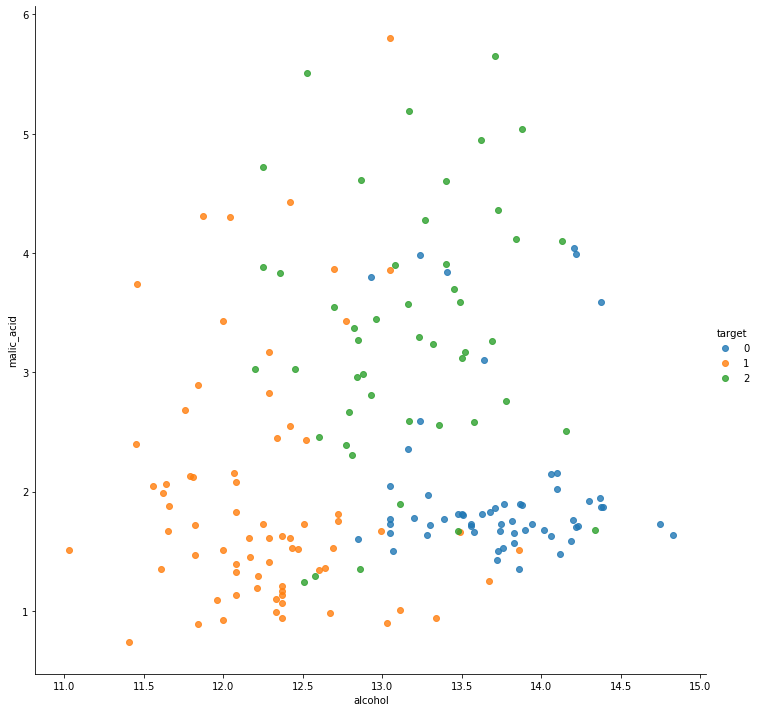

In [207]:
# Data acquisition and visualization
df, data = load_wine_dataset()
plot_2D_representation()

enable_plot = False

KNN on 2-dimensional data
k = 1
Accuracy: 0.7222222222222222
k = 3
Accuracy: 0.8055555555555556
k = 5
Accuracy: 0.9166666666666666
k = 7
Accuracy: 0.9166666666666666
- - - - - - - - - - - -
KNN on 2-dimensional data on test with best K (5) found
Accuracy: 0.7777777777777778



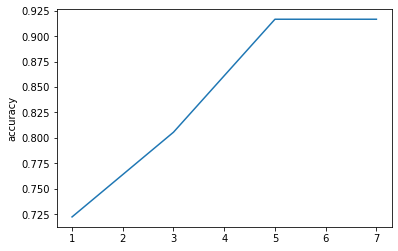

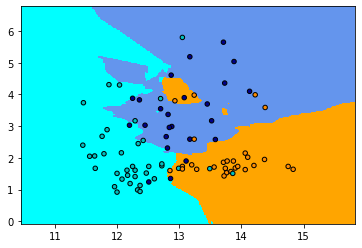

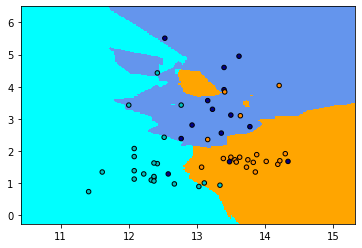

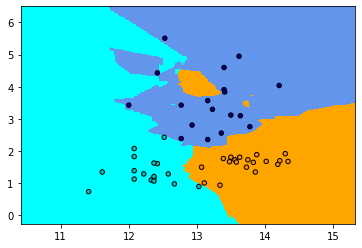

In [208]:
# KNN Classifier
knn_accuracy = run_knn_wrapper()
plot_accuracy_on_parameters_variation(knn_accuracy)
evaluate_knn_on_best_K(knn_accuracy)

LinearSVM on 2-dimensional data
C = 0
Accuracy: 0.3611111111111111
C = 0
Accuracy: 0.5277777777777778
C = 0
Accuracy: 0.6944444444444444
C = 1
Accuracy: 0.8333333333333334
C = 10
Accuracy: 0.8333333333333334
C = 100
Accuracy: 0.8333333333333334
C = 1000
Accuracy: 0.8333333333333334
- - - - - - - - - - - -
LinearSVM on 2-dimensional data on test with best C (1) found
Accuracy: 0.6851851851851852



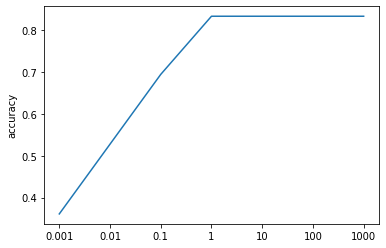

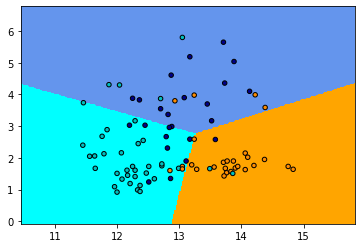

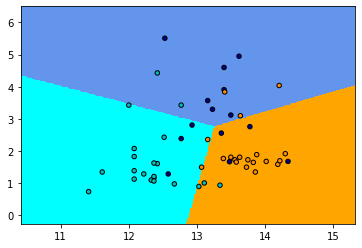

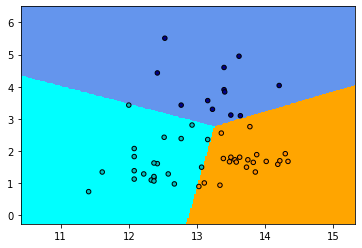

In [228]:
# Linear Support Vector Machine
linear_svm_accuracy = run_linear_svm_wrapper()
plot_accuracy_on_parameters_variation(linear_svm_accuracy)
evaluate_linear_svm_on_best_C(linear_svm_accuracy)

SVM with RBF kernel on 2-dimensional data
C = 0
Accuracy: 0.3611111111111111
C = 0
Accuracy: 0.5277777777777778
C = 0
Accuracy: 0.6944444444444444
C = 1
Accuracy: 0.8333333333333334
C = 10
Accuracy: 0.8333333333333334
C = 100
Accuracy: 0.8333333333333334
C = 1000
Accuracy: 0.8333333333333334
- - - - - - - - - - - -
SVM with RBF kernel on 2-dimensional data on test with best C (1) found
Accuracy: 0.7407407407407407



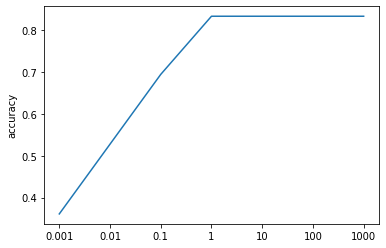

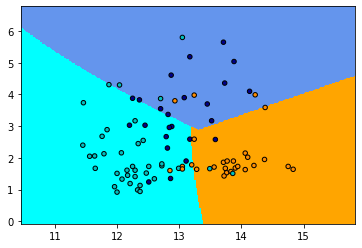

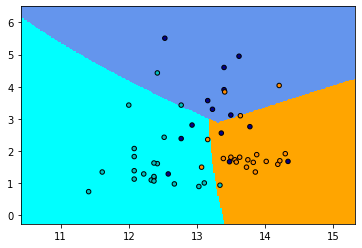

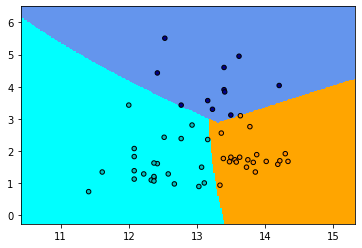

In [227]:
# Kernel RBF Support Vector Machine
linear_rbf_accuracy = run_rbf_svm_wrapper()
plot_accuracy_on_parameters_variation(linear_rbf_accuracy)
evaluate_rbf_svm_on_best_C(linear_rbf_accuracy)

### 1. Load Wine dataset (scikit library)
### 2. Select the first two attributes for a 2D representation of the image.

In [ ]:
def load_wine_dataset():
    data = load_wine()

    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = pd.Series(data.target)

    return df, data

def plot_2D_representation():
    df_splitted = df[['alcohol','malic_acid', 'target']]
    sns.lmplot('alcohol', 'malic_acid', hue='target', data=df_splitted, height=10,  fit_reg=False)

### 3. Randomly split data into train, validation and test sets in proportion 5:2:3

### 4. For K = [1,3, 5,7]:
####      a. Apply K-Nearest Neighbors
####      b. Plot the data and the decision boundaries 
####      c. Evaluate the method on the validation set

### 5. Plot a graph showing how the accuracy on the validation set varies when changing K

### 6. How the boundaries change? Why?

### 7. Use the best value of K and evaluate the model on the test set.
#### How well does it works?

In [213]:
def run_knn_wrapper():
    # 2-dimensional data
    print("KNN on 2-dimensional data")

    X = data.data[:,0:2]
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    validation_size = 0.2 / 0.7
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)
    accuracy_2D = run_knn()
    return accuracy_2D
    
def run_knn(K = [1,3,5,7]):
    global enable_plot
    accuracy = {}

    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_val)

        if(enable_plot == True):
            print("Train data")
            plot_data_and_decision_boundary(knn, X_train, y_train)

            print("Evaluation data")
            plot_data_and_decision_boundary(knn, X_val, y_val)

            print("Predicted")
            plot_data_and_decision_boundary(knn, X_val, y_pred)

        plt.show()

        print("K = %i" % (k))
        print("Accuracy: " + str(accuracy_score(y_val, y_pred)))
        
        accuracy[k] = accuracy_score(y_val, y_pred)
        
    
    print("- - - - - - - - - - - -")
    return accuracy
    
def evaluate_knn_on_best_K(accuracy):
    best_k = max(accuracy, key=accuracy.get)

    # 2-dimensional data
    print("KNN on 2-dimensional data on test with best K (" + str(best_k) + ") found")

    X = data.data[:,0:2]
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    validation_size = 0.2 / 0.7

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
    print()

    plot_data_and_decision_boundary(knn, X_train, y_train)
    plot_data_and_decision_boundary(knn, X_test, y_test)
    plot_data_and_decision_boundary(knn, X_test, y_pred)

### 8. For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]: 
#### a. Train a linear SVM on the training set
#### b. Plot the data and the decision boundaries 
#### c. Evaluate the method on the validation set
### 9. Plot a graph showing how the accuracy on the validation set varies when changing C
### 10. How the boundaries change? Why?
### 11. Use the best value of C and evaluate the model on the test set.
#### How well does it works?
 

In [218]:
def run_linear_svm_wrapper():
    # 2-dimensional data
    print("LinearSVM on 2-dimensional data")

    X = data.data[:,0:2]
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    validation_size = 0.2 / 0.7
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

    accuracy_2D = run_linear_svm()
    return accuracy_2D

def run_linear_svm(C = [0.001, 0.01, 0.1, 1, 10, 100,1000]):
    global enable_plot
    accuracy = {}

    for c in C:
        svm = LinearSVC(C = c, max_iter = 10000000)
        svm.fit(X_train, y_train)

        y_pred = svm.predict(X_val)
        
        if(enable_plot == True):
            print("Train data")
            plot_data_and_decision_boundary(svm, X_train, y_train)

            print("Evaluation data")
            plot_data_and_decision_boundary(svm, X_val, y_val)

            print("Predicted")
            plot_data_and_decision_boundary(svm, X_val, y_pred)

            plt.show()

        print("C = %i" % (c))
        print("Accuracy: " + str(accuracy_score(y_val, y_pred)))
        
        accuracy[str(c)] = accuracy_score(y_val, y_pred)
        
    print("- - - - - - - - - - - -")
    return accuracy  

def evaluate_linear_svm_on_best_C(accuracy):
    best_c = max(accuracy, key=accuracy.get)

    # 2-dimensional data
    print("LinearSVM on 2-dimensional data on test with best C (" + best_c + ") found")

    X = data.data[:,0:2]
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    validation_size = 0.2 / 0.7
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

    svm = LinearSVC(C = float(best_c), max_iter = 10000000)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)

    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
    print()

    plot_data_and_decision_boundary(svm, X_train, y_train)
    plot_data_and_decision_boundary(svm, X_test, y_test)
    plot_data_and_decision_boundary(svm, X_test, y_pred)

In [226]:
def run_rbf_svm_wrapper():
    # 2-dimensional data
    print("SVM with RBF kernel on 2-dimensional data")

    X = data.data[:,0:2]
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    validation_size = 0.2 / 0.7
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

    accuracy_2D = run_linear_svm()
    return accuracy_2D

def run_rbf_svm(C = [0.001, 0.01, 0.1, 1, 10, 100,1000]):
    global enable_plot
    accuracy = {}

    for c in C:
        svm = SVC(kernel = 'rbf', C = c, max_iter = 10000000)
        svm.fit(X_train, y_train)

        y_pred = svm.predict(X_val)
        
        if(enable_plot == True):
            print("Train data")
            plot_data_and_decision_boundary(svm, X_train, y_train)

            print("Evaluation data")
            plot_data_and_decision_boundary(svm, X_val, y_val)

            print("Predicted")
            plot_data_and_decision_boundary(svm, X_val, y_pred)

            plt.show()

        print("C = %i" % (c))
        print("Accuracy: " + str(accuracy_score(y_val, y_pred)))
        
        accuracy[str(c)] = accuracy_score(y_val, y_pred)
        
    print("- - - - - - - - - - - -")
    return accuracy  

def evaluate_rbf_svm_on_best_C(accuracy):
    best_c = max(accuracy, key=accuracy.get)

    # 2-dimensional data
    print("SVM with RBF kernel on 2-dimensional data on test with best C (" + best_c + ") found")

    X = data.data[:,0:2]
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    validation_size = 0.2 / 0.7
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

    svm = SVC(kernel = 'rbf', C = float(best_c), max_iter = 10000000)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)

    print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
    print()

    plot_data_and_decision_boundary(svm, X_train, y_train)
    plot_data_and_decision_boundary(svm, X_test, y_test)
    plot_data_and_decision_boundary(svm, X_test, y_pred)

#### Shared code

In [220]:
def plot_data_and_decision_boundary(clf, X, y):
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    h = .02  # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
def plot_accuracy_on_parameters_variation(accuracy):
    accuracy_df = pd.DataFrame.from_dict(accuracy, orient='index', columns=["accuracy"])
    sns.lineplot(x=accuracy_df.index, y="accuracy",data=accuracy_df)